# EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from Kaggle competition.

The task: Build a model the predicts which people would survive with the given information about the 891 people aboard

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch` and `Fare` features**

### Read the data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Deal with continuous features

In [9]:
# Keep only numerical features

cat_feat = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

KeyError: "['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] not found in axis"

In [10]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Few thisngs we can see from the statistics:
- The `Age` feature has missing data - the count is only 714, when it is 891 in the other features
- The mean of the `Survived` feature can tell us the percentage of people survived - This features accepts only 0/1 values, so the mean can tell us the exact survival rate ~ 38.4%
- `Pcalss` - gets the values 1/2/3.

Useful tool to understand which are the important features is the `groupby` option and display the histogram of this grouped dataset by the target:

In [11]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


For example, it looks like the average age of the survived people is 30.63 and the average for those who didn't survive was 28.34.

Moreover, these is a big gap in the values in the `Fare` feature between those who survived and those who didn't. 

Next - **missing values**

We want to understand which values are missing and how much, whether those values are missing at random or in a systematic way

In [12]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


People who their age is missing is less likely to survive (lower prob.), had a higher class number, and a lower fair. However this information doen't point out at any systematic way of the missing values.

### Plot continuous features

Plot an overlaid histograms in order to compate the distribution of a ceratin feature fro the different taget labels

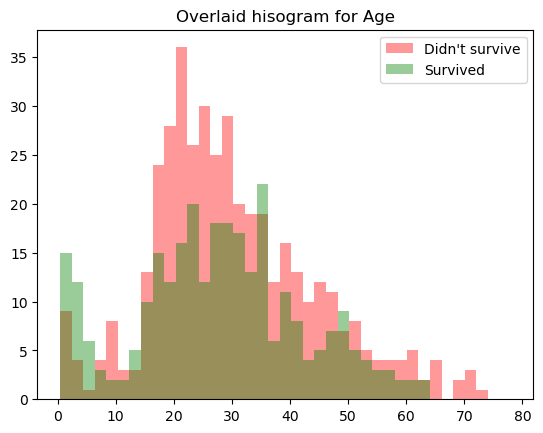

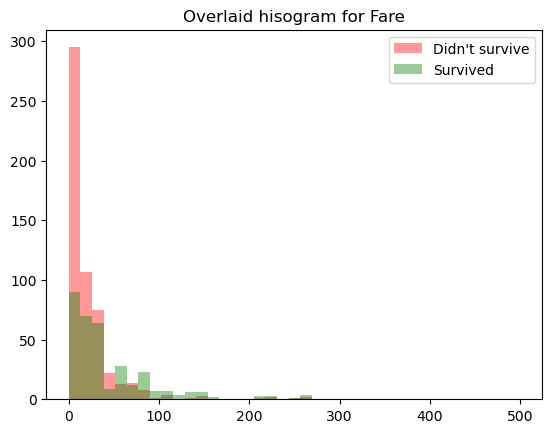

In [16]:
# first - look at the truely continuous variables

for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0 ][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1 ][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins = np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins = np.arange(xmin, xmax, width))
    plt.legend(["Didn't survive", "Survived"])
    plt.title('Overlaid hisogram for {}'.format(i))
    plt.show()

<Figure size 640x480 with 0 Axes>

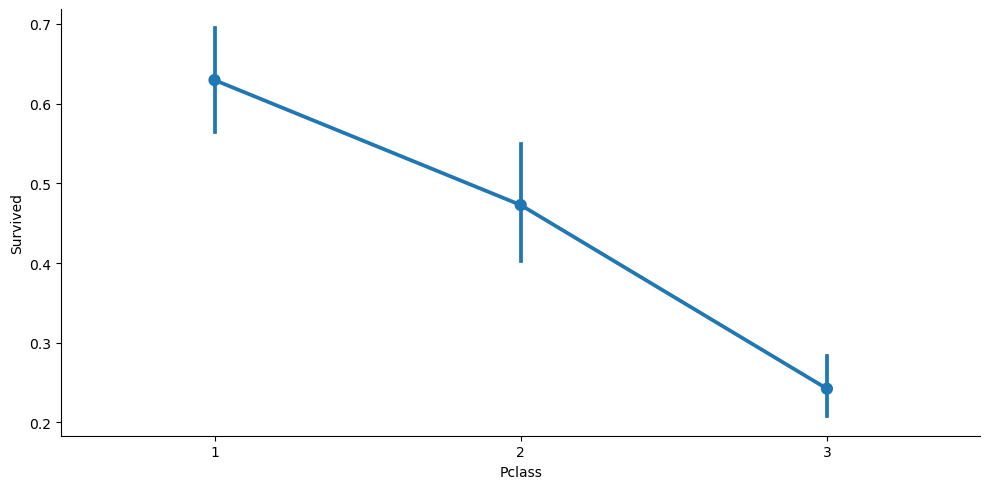

<Figure size 640x480 with 0 Axes>

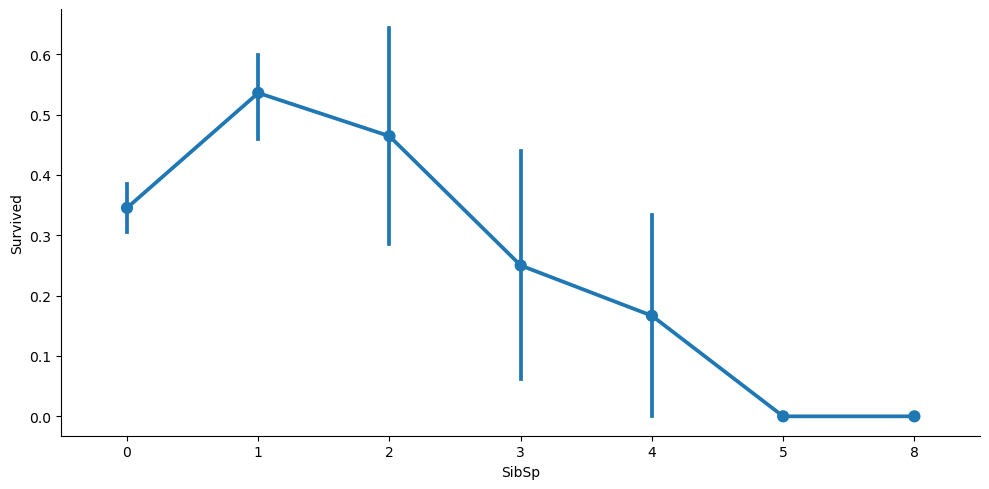

<Figure size 640x480 with 0 Axes>

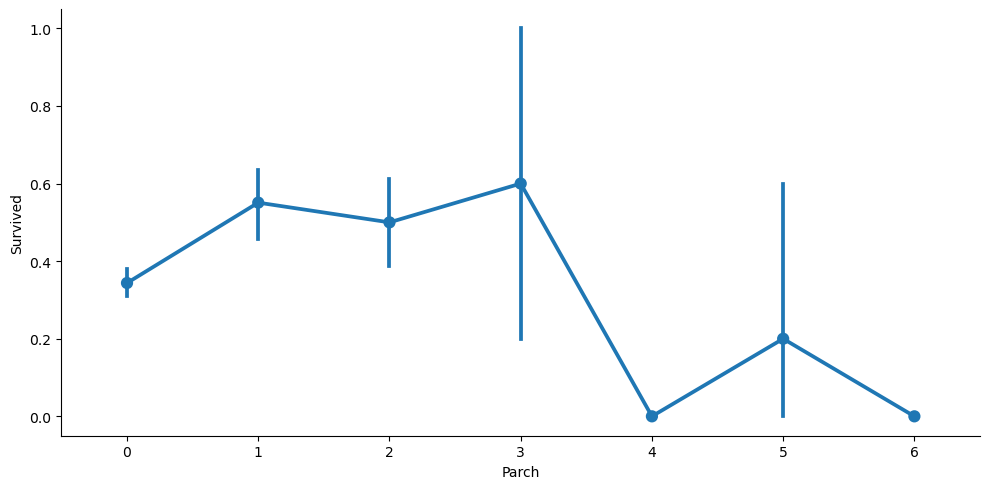

In [17]:
# next - look at the categorical variables by making a categorical plot
for i in ['Pclass', 'SibSp', 'Parch']:
    plt.figure()
    sns.catplot(x=i, y='Survived', data=titanic, kind='point', aspect=2)

Each point presents the average of people who survived at each level of the input feature.
Few ontes about the results:
- Lower class is more likely to survive
- People with more siblings are less likely to survive
- People with both parents and siblings on board are also less likely to survive.

We can merge the data in the `SibSp` and the `Parch` features into a single `family_cnt` feature

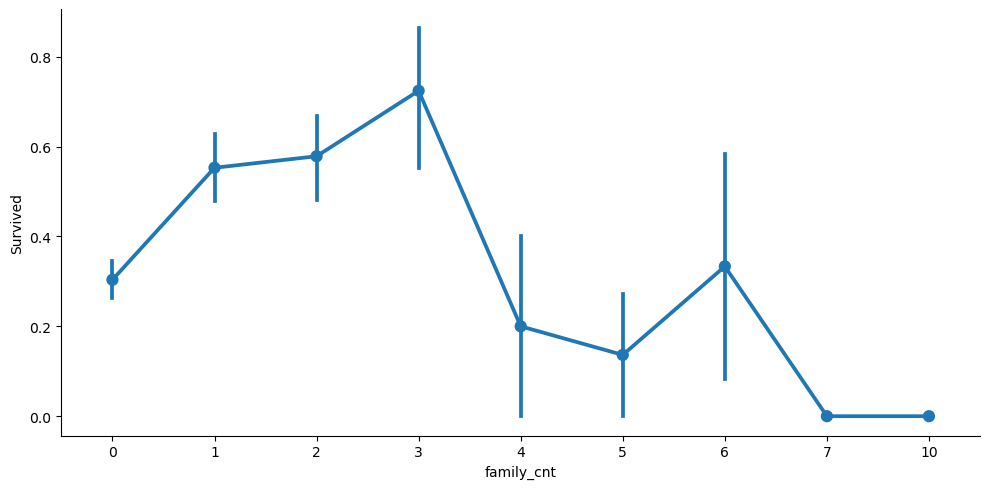

In [18]:
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='family_cnt', y='Survived', data=titanic, kind='point', aspect=2)

We can see the the general pattern still exists - the more people in your family the less likely to survive.

Next, we need to drop the `SibSp` and the `Parch` features to prevent duplicates

In [22]:
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic.head(10)

,Survived,Pclass,Age,Fare,family_cnt
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,1
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,1
4,0,3,35.000000,8.0500,0
5,0,3,29.699118,8.4583,0
6,0,1,54.000000,51.8625,0
7,0,3,2.000000,21.0750,4
8,1,3,27.000000,11.1333,2
9,1,2,14.000000,30.0708,1


### Fill missing values for `Age`

As seen above, there is no visible trend in the missing values in the `Age` feature, so further on we assume for the missing values to be random.

We will fill in the missing values by the average value of this feature. This way we will be able to use those input rows without changing the statistics of the `Age` feature.

In [20]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# next - check if the filling was done right and there are no more missing values in the dataset:
titanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
family_cnt    0
dtype: int64

great!

In [21]:
titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
6,0,1,54.000000,0,0,51.8625,0
7,0,3,2.000000,3,1,21.0750,4
8,1,3,27.000000,0,2,11.1333,2
9,1,2,14.000000,1,0,30.0708,1


### Deal with categorical features

In [24]:
# Keep only categorical features:
titanic = pd.read_csv('train.csv')
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


#### Explore categorical features

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


There are a log of missing values in `Cabin` feature, and few missing values in `Embarked` feature

In [26]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


When `Cabin` = True, it means it's missing.

Over 66% of the people who have non missing cabin value survived, when less than 30% of those that have missing value survived.

This means that the `Cabin` value is not missing at random, it's actually a very strong indicator whether a person had survived or not. 

Usually, when we see this huge amout of missing values in a ceratin column we will just drop it, but here, with a little exploration, we discover a very powerful indicator whether a person had survived or not. 

In order to store this meaningful information about the missing values in the `Cabin` feature, we will create a new binary indicator that says whether a person has a value for `Cabin` feature or not.

In [27]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 640x480 with 0 Axes>

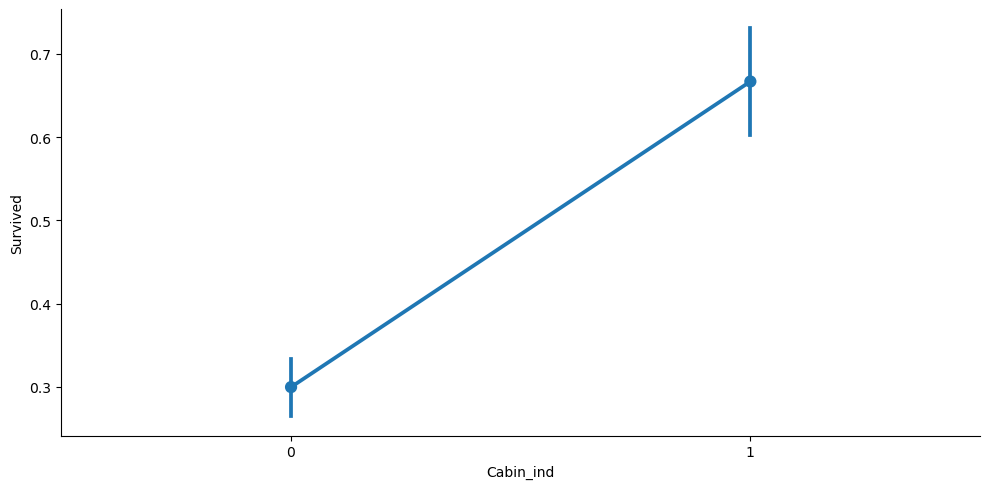

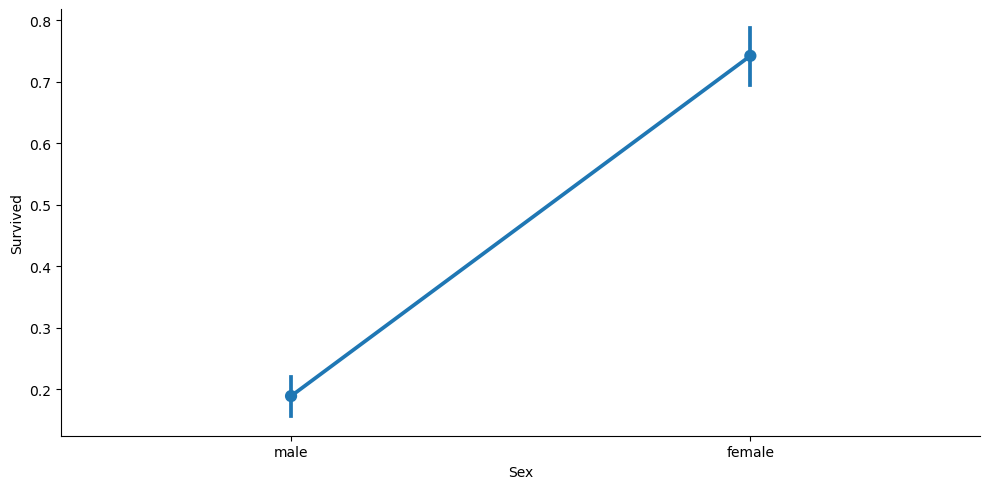

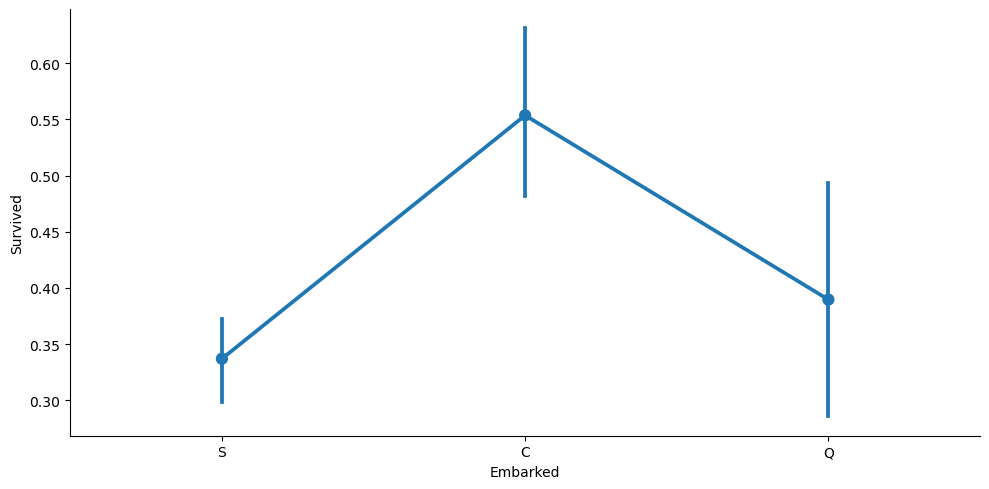

In [29]:
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

The `Embarked` feature tells us where the person got on board. Let's dig a little bit deeper:

In [30]:
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [31]:
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


There is a big difference in the numbers for the Q and the S categories, which can be explainable by the `Sex` and `Cabin_ind` features, meaning no additional information is given by the `Embarked` feature and is can be dropped out.

We will also drop the `cabin` feature since other than using it for the missing values extraction, there is no other use of it.

In [34]:
titanic.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
titanic.head(10)

,Survived,Sex,Ticket,Cabin_ind
0,0,0,A/5 21171,0
1,1,1,PC 17599,1
2,1,1,STON/O2. 3101282,0
3,1,1,113803,1
4,0,0,373450,0
5,0,0,330877,0
6,0,0,17463,1
7,0,0,349909,0
8,1,1,347742,0
9,1,1,237736,0


### Convert `Sex` to numeric

It is better to convert all categorical string features to binary int. indicator so the model will perform better (also some of the ML models don't know how to deal with this kind of info).
Since this is a binary indicator, we will convert it to an int. 0/1 indicator. 

In [32]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)

In [33]:
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,0,A/5 21171,NaN,S,0
1,1,1,PC 17599,C85,C,1
2,1,1,STON/O2. 3101282,NaN,S,0
3,1,1,113803,C123,S,1
4,0,0,373450,NaN,S,0


Now let's implement all the Analysis and cleaning results of botht eh numerical and categorical features into one dataset

### Final dataset

In [37]:
# read csv file
titanic = pd.read_csv('train.csv')
# Drop `Name` and `Ticket` irrelevant features
titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
# create `family_cnt` feature and `drop `SibSp` & `Parch` features
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# fill missing values in `Age` feature
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
# use the info from the missing values in the `Cabin` feature as a feature and drop the `Cabin` & `Embarked` feautres
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
# Convert `Sex` feature to binary feature of 0/1
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
# display final dataset
titanic.head(10)

,Survived,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,1
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,1
7,0,3,0,2.000000,21.0750,4,0
8,1,3,1,27.000000,11.1333,2,0
9,1,2,1,14.000000,30.0708,1,0
